## Genuis AI Internship Task
### Name : Aryan Kenchappagol    |    Contact : aryan.kenchappagol@gmail.com 

In [36]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import xgboost as xgb

In [2]:
df = pd.read_csv('taskdata.csv')
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [3]:
df.shape

(4407, 17)

## Checking Missing Values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4407 entries, 0 to 2203
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

#### We see that there are no missing values present in the dataframe and it is good to go

# Exploratory Data Analysis

## Corelation among the features of the dataset

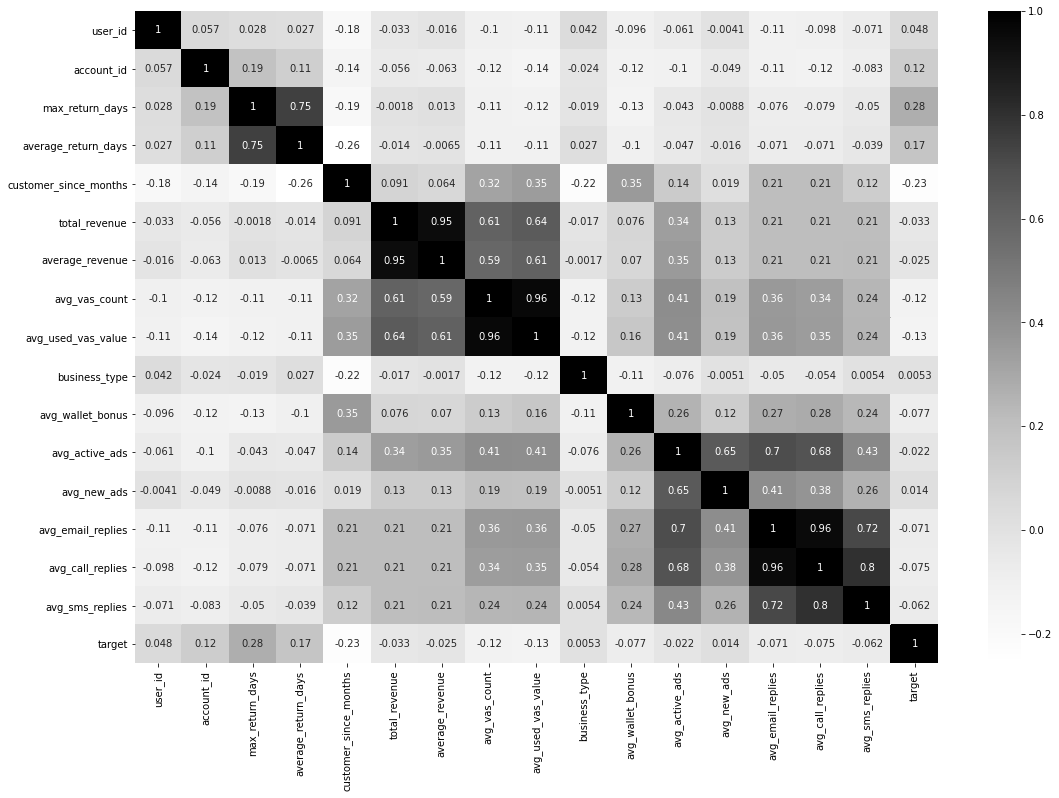

In [28]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, cmap='Greys')
plt.show()

### From the above Heatmap plotted, 
### we can see that the following features have a strong corelation among each other and must be taken care of. 
### They include : 
### 1) max_return_days and average_return_days
### 2) average_revenue and total_revenue
### 3) average_used_vas_value and avg_vas_count
### 4) avg_email_replies and avg_call_replies
### 5) avg_sms_replies and avg_call_replies

## Distribution of dataset in terms of Business Type

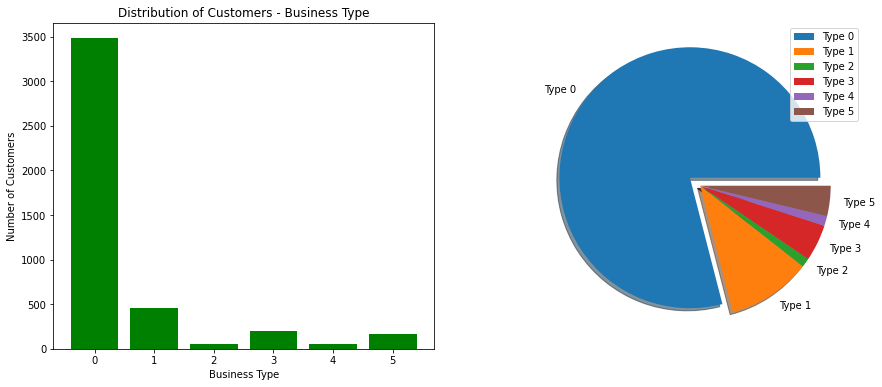

In [6]:
type_b = [0,1,2,3,4,5]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.bar(type_b, [3482, 458, 49, 199, 54, 165], color='green')
plt.title("Distribution of Customers - Business Type")
plt.xlabel("Business Type")
plt.ylabel("Number of Customers")

#pie chart
plt.subplot(1,2,2)
business_type = ["Type 0","Type 1","Type 2","Type 3","Type 4",'Type 5']
value_b = [3482, 458,49,199,54,165]
exp = [0.1,0,0,0,0,0]
plt.pie(value_b, labels=business_type, explode=exp, shadow=True)
plt.legend()
plt.show()

### From the above figures - Bar plot and Pie chart we can confirm that a majority of the customers belong to come from Business Type 1 background

In [37]:
df['business_type'].value_counts()

0    3482
1     458
3     199
5     165
4      54
2      49
Name: business_type, dtype: int64

In [38]:
df.sort_values('business_type', inplace=True)

### Dividing the DataFrame according to Business Type feature for Data Analysis

In [41]:
df.iloc[3482]
df0 = df.iloc[0:3483]
df1 = df.iloc[3482:3940]
df2 = df.iloc[3940:3989]
df3 = df.iloc[3989:4188]
df4 = df.iloc[4188:4242]
df5 = df.iloc[4242:]

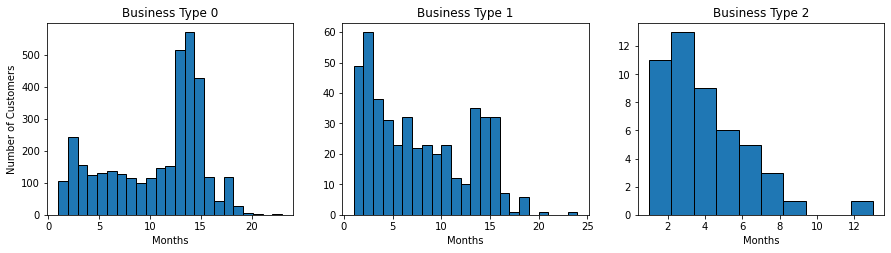

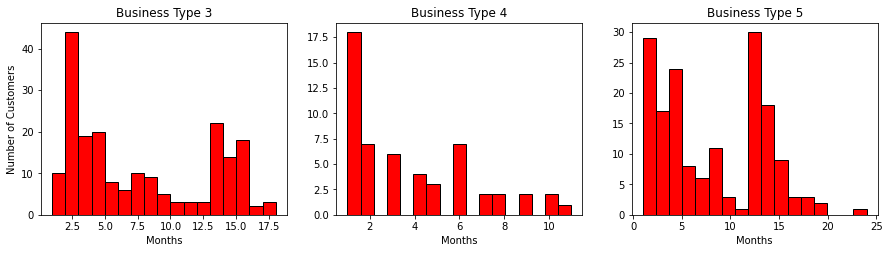

In [44]:
plt.figure(figsize=(15,12))
plt.subplot(3,3,1) # row, column, value
plt.hist(df0['customer_since_months'], ec='black', bins=23)
plt.title('Business Type 0')
plt.xlabel('Months')
plt.ylabel('Number of Customers')
# plt.show()

# plt.figure(figsize=(10,10))
plt.subplot(3,3,2)
plt.hist(df1['customer_since_months'], ec='black', bins=23)
plt.title('Business Type 1')
plt.xlabel('Months')
# plt.ylabel('Number of Customers')
# plt.show()

# plt.figure(figsize=(10,10))
plt.subplot(3,3,3)
plt.hist(df2['customer_since_months'], ec='black', bins=10)
plt.title('Business Type 2')
plt.xlabel('Months')
# plt.ylabel('Number of Customers')
# plt.show()


plt.figure(figsize=(15,12))
plt.subplot(3,3,4)
plt.hist(df3['customer_since_months'], ec='black', bins=17, color='red')
plt.title('Business Type 3')
plt.xlabel('Months')
plt.ylabel('Number of Customers')

plt.subplot(3,3,5)
plt.hist(df4['customer_since_months'], ec='black', bins=17, color='red')
plt.title('Business Type 4')
plt.xlabel('Months')
# plt.ylabel('Number of Customers')

plt.subplot(3,3,6)
plt.hist(df5['customer_since_months'], ec='black', bins=17, color='red')
plt.title('Business Type 5')
plt.xlabel('Months')
# plt.ylabel('Number of Customers')
plt.show()

### From the above Histograms we confirm that Business Type 1 has almost a Normal Distribution for the feature 'Customer Since Months' Accordingly as the 79% of data has been occupied by Customers form Type 1 

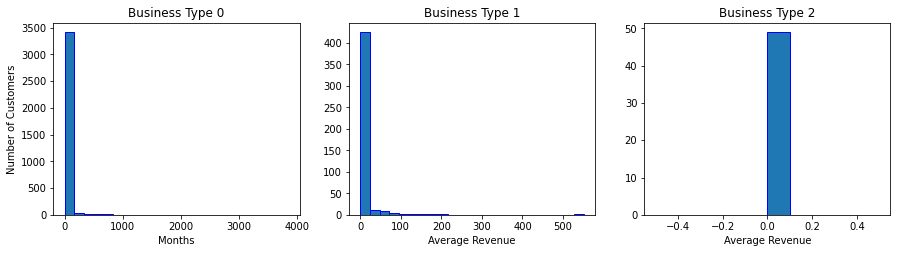

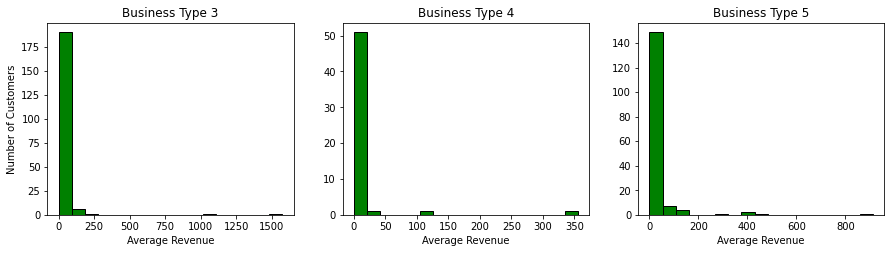

In [95]:
plt.figure(figsize=(15,12))
plt.subplot(3,3,1) # row, column, value
plt.hist(df0['average_revenue'], ec='blue', bins=23)
plt.title('Business Type 0')
plt.xlabel('Months')
plt.ylabel('Number of Customers')
# plt.show()

# plt.figure(figsize=(10,10))
plt.subplot(3,3,2)
plt.hist(df1['average_revenue'], ec='blue', bins=23)
plt.title('Business Type 1')
plt.xlabel('Average Revenue')
# plt.ylabel('Number of Customers')
# plt.show()

# plt.figure(figsize=(10,10))
plt.subplot(3,3,3)
plt.hist(df2['average_revenue'], ec='blue', bins=10)
plt.title('Business Type 2')
plt.xlabel('Average Revenue')
# plt.ylabel('Number of Customers')
# plt.show()


plt.figure(figsize=(15,12))
plt.subplot(3,3,4)
plt.hist(df3['average_revenue'], ec='black', bins=17, color='green')
plt.title('Business Type 3')
plt.xlabel('Average Revenue')
plt.ylabel('Number of Customers')

plt.subplot(3,3,5)
plt.hist(df4['average_revenue'], ec='black', bins=17, color='green')
plt.title('Business Type 4')
plt.xlabel('Average Revenue')
# plt.ylabel('Number of Customers')

plt.subplot(3,3,6)
plt.hist(df5['average_revenue'], ec='black', bins=17, color='green')
plt.title('Business Type 5')
plt.xlabel('Average Revenue')
# plt.ylabel('Number of Customers')
plt.show()

### From the above histograms the average revenue for all the business types is inconsistent. 
### Also according to the heatmap we see that there is very high relation between total revenue and average revenue. Hence dropping the average_revenue column would be useful

In [11]:
df0

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0000,0.000000,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
2650,7190496524,1005.0,1,1.000000,16,0.0000,0.000000,4.615385,106.153846,0,1050.0,20.076923,1.153846,13.692308,10.615385,0.076923,0
2653,7190979837,262.0,12,2.000000,13,0.0000,0.000000,1.083333,30.833333,0,100.0,10.666667,0.416667,7.166667,9.583333,0.000000,0
2654,7190992726,262.0,1,1.000000,14,0.0000,0.000000,0.615385,15.384615,0,68.5,34.000000,5.153846,11.384615,5.538462,0.000000,0
2655,7191095056,262.0,2,1.071429,14,0.0000,0.000000,7.000000,141.538462,0,800.0,122.076923,19.461538,27.692308,31.230769,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,4461233,111.0,1,1.000000,14,0.0000,0.000000,9.692308,264.615385,0,187.0,334.769231,32.615385,39.307692,54.384615,0.076923,0
129,4216566,496.0,7,1.375000,16,0.0000,0.000000,5.846154,86.923077,0,300.0,85.692308,21.230769,27.538462,31.307692,0.000000,0
1427,631319065,112.0,1,1.000000,14,279.3008,21.484677,26.000000,456.153846,0,485.5,315.615385,50.000000,142.461538,196.230769,1.923077,0
1537,635905282,112.0,1,1.000000,11,0.0000,0.000000,16.909091,350.909091,0,0.0,529.000000,26.727273,26.909091,30.000000,0.000000,0


In [12]:
df0.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,3.483000e+03,3479.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000
mean,3.898719e+09,514.398103,22.317829,6.802706,10.607809,219.820840,18.123187,3.722579,82.730703,0.000287,403.784993,114.655688,17.619824,27.957736,29.964417,0.160184,0.104508
std,6.553141e+09,324.397398,44.032875,18.776610,4.941945,1708.174388,138.191615,6.009881,126.911168,0.016944,903.237533,318.670447,56.734970,58.811176,65.230281,0.525418,0.305962
min,4.100390e+05,111.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.160619e+08,226.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.444444,10.000000,0.000000,0.000000,20.472222,3.083333,5.645833,5.500000,0.000000,0.000000
50%,6.565453e+08,493.000000,2.000000,1.076923,13.000000,0.000000,0.000000,2.500000,58.000000,0.000000,100.000000,54.000000,7.461538,14.833333,15.000000,0.000000,0.000000
75%,7.266176e+09,1005.000000,30.000000,5.133333,14.000000,0.000000,0.000000,4.833333,108.333333,0.000000,420.000000,120.000000,15.961538,30.683333,33.692308,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,23.000000,43957.172700,3852.727273,156.583333,3357.500000,1.000000,15606.500000,9183.866667,2061.428571,1716.400000,1743.266667,14.636364,1.000000


In [13]:
total_income = [df0['total_revenue'].sum(), df1['total_revenue'].sum(), df2['total_revenue'].sum(), df3['total_revenue'].sum(), df4['total_revenue'].sum(), df5['total_revenue'].sum()]
# total_income

In [14]:
avg_income = [df0['average_revenue'].sum(),df1['average_revenue'].sum(),df2['average_revenue'].sum(),df3['average_revenue'].sum(),df4['average_revenue'].sum(),df5['average_revenue'].sum(),]
# avg_income

### Total Revenue and Average Revenue made by customers of diffferent Business Types

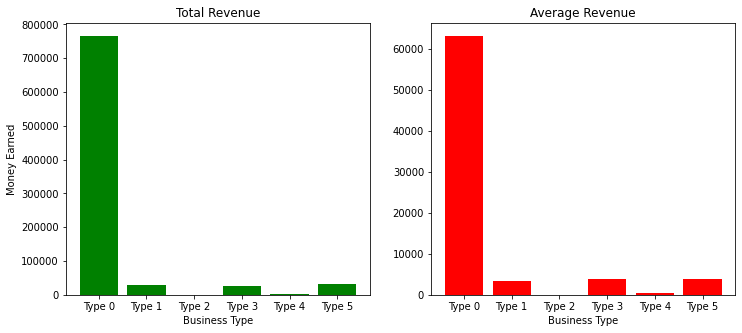

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(business_type, total_income, color='green')
plt.title("Total Revenue")
plt.xlabel('Business Type')
plt.ylabel('Money Earned')

plt.subplot(1,2,2)
plt.bar(business_type, avg_income, color='red')
plt.title("Average Revenue")
plt.xlabel('Business Type')
# plt.ylabel('Money Earned')
plt.show()

### Above Graphs are a proof that majority of the data is handled by business type 1 and it kind of adds an imbalance to the dataset values for different features.
### Hence confidering the above scenario we have to normalize the values of the dataset and should drop the business type feature from the dataset

## Media Replies

In [50]:
type_b = [0,1,2,3,4,5]
email = [df0['avg_email_replies'].mean(),
         df1['avg_email_replies'].mean(),
         df2['avg_email_replies'].mean(),
         df3['avg_email_replies'].mean(),
         df4['avg_email_replies'].mean(),
         df5['avg_email_replies'].mean()]

call = [df0['avg_call_replies'].mean(),
        df1['avg_call_replies'].mean(),
        df2['avg_call_replies'].mean(),
        df3['avg_call_replies'].mean(),
        df4['avg_call_replies'].mean(),
        df5['avg_call_replies'].mean()]

sms = [df0['avg_sms_replies'].mean(),
       df1['avg_sms_replies'].mean(),
       df2['avg_sms_replies'].mean(),
       df3['avg_sms_replies'].mean(),
       df4['avg_sms_replies'].mean(),
       df5['avg_sms_replies'].mean()]

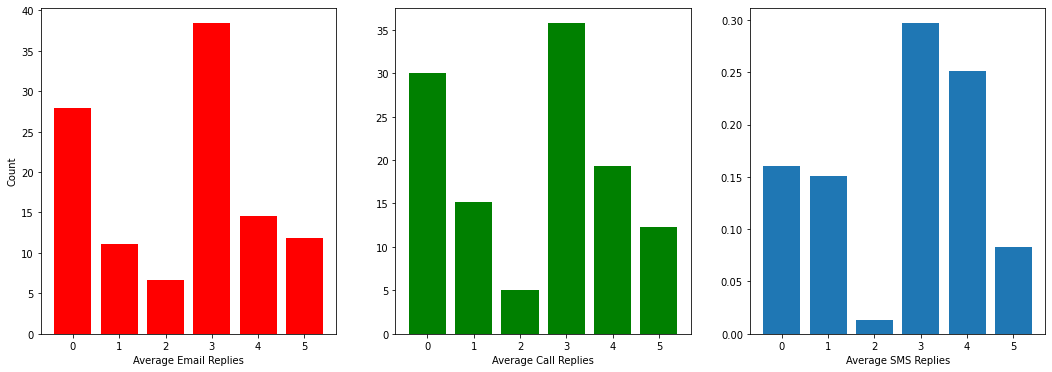

In [51]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.bar(type_b, email,color='red')
plt.xlabel("Average Email Replies")
plt.ylabel("Count")
plt.subplot(1,3,2)
plt.bar(type_b, call,color='green')
plt.xlabel("Average Call Replies")
plt.subplot(1,3,3)
plt.bar(type_b, sms)
plt.xlabel("Average SMS Replies")
plt.show()

### As assumed in the 1st set of histograms, we thought of majority of the dataset is under business type 1 customers but from the above set of graphs we average media replies from business type 1 is average as compared to other business types. 

<Figure size 1080x1080 with 0 Axes>

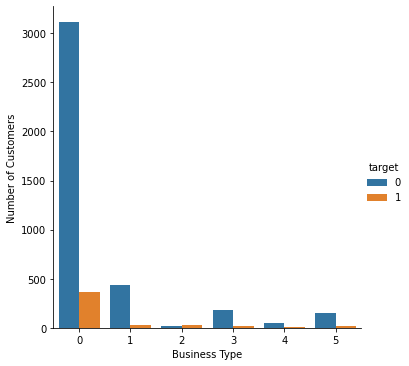

In [18]:
plt.figure(figsize=(15,15))
sns.catplot(x='business_type', hue='target', kind='count', data=df)
plt.xlabel('Business Type')
plt.ylabel('Number of Customers')
plt.show()

### The feautre business type shows a lot of diversity with the different features of the dataset hence dropping the column would be a good decision

## Corelation among the media features

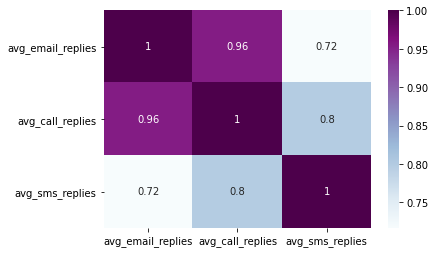

In [77]:
plt.figure(figsize=(6,4))
df_media = df[['avg_email_replies','avg_call_replies','avg_sms_replies']]
sns.heatmap(df_media.corr(), annot=True, cmap='BuPu')
plt.show()

### Classifying the features athrough the heat map we may drop any ome of the media feature

In [53]:
df.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

### Dividing the DataFrame into labels and target

In [78]:
X = df[['max_return_days', 'average_return_days',
       'customer_since_months',
       'avg_vas_count', 'total_revenue',
       'avg_wallet_bonus', 'avg_new_ads',
       'avg_email_replies', 'avg_sms_replies']]
y = df['target']

In [79]:
X

,max_return_days,average_return_days,customer_since_months,avg_vas_count,total_revenue,avg_wallet_bonus,avg_new_ads,avg_email_replies,avg_sms_replies
0,8,1.5,14,3.666667,0.0000,300.00,15.250000,32.416667,0.250000
604,1,1.0,15,2.142857,0.0000,600.00,27.357143,40.071429,0.071429
605,1,1.0,13,5.153846,0.0000,31.00,12.923077,4.538462,0.000000
448,1,1.0,14,4.307692,0.0000,0.00,15.384615,23.384615,0.076923
606,1,1.0,15,14.416667,392.9024,418.75,27.250000,127.583333,0.500000
...,...,...,...,...,...,...,...,...,...
3497,60,60.0,2,0.000000,0.0000,0.00,1.000000,0.000000,0.000000
3664,35,13.8,5,0.000000,0.0000,0.00,3.428571,1.714286,0.000000
459,1,1.0,13,1.769231,0.0000,500.00,3.307692,34.384615,0.000000
3538,1,1.0,2,0.000000,0.0000,0.00,1.000000,2.500000,0.000000


## The values of the features are varied so it is neccesary to scale all the features using standard scaler

In [86]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [98]:
# values scaled
X

array([[-0.32890157, -0.29528828,  0.79819962, ..., -0.02295775,
         0.12176271,  0.16998761],
       [-0.4895025 , -0.32132058,  0.99165866, ...,  0.15498855,
         0.26014027, -0.17498845],
       [-0.4895025 , -0.32132058,  0.60474058, ..., -0.057158  ,
        -0.38220047, -0.31297888],
       ...,
       [-0.4895025 , -0.32132058,  0.60474058, ..., -0.19848136,
         0.15733794, -0.31297888],
       [-0.4895025 , -0.32132058, -1.52330886, ..., -0.23239896,
        -0.41905039, -0.31297888],
       [-0.4895025 , -0.32132058,  0.79819962, ..., -0.2380519 ,
        -0.4559003 , -0.31297888]])

## Splitting into training and testing groups

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## XGBoost

In [88]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train,y_train)


0.9024943310657596

## Training the Model

In [92]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Model accuracy on training data

In [89]:
model.score(X_train, y_train)

0.9062905317769131

## Model accuracy on Validation Data

In [93]:
model.score(X_test,y_test)

0.9024943310657596